In [ ]:
#Long Short-Term Memory Networks (LSTM)

In [1]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical

In [2]:
%matplotlib inline

In [3]:
# Step 2: Load and preprocess the IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

In [4]:
# Step 3: Pad the sequences to ensure they all have the same length
maxlen = 500
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [5]:
# Step 4: Convert labels to categorical
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

In [6]:
# Step 5: Build the LSTM model
model = models.Sequential()
model.add(layers.Embedding(input_dim=10000, output_dim=128, input_length=maxlen))
model.add(layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(layers.Dense(2, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [7]:
# Step 6: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Step 7: Train the model
history = model.fit(x_train, y_train, epochs=3, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 677s 2s/step - accuracy: 0.7107 - loss: 0.5435 - val_accuracy: 0.8418 - val_loss: 0.3733
Epoch 2/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 683s 2s/step - accuracy: 0.8619 - loss: 0.3322 - val_accuracy: 0.8372 - val_loss: 0.3848
Epoch 3/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 647s 2s/step - accuracy: 0.8810 - loss: 0.2949 - val_accuracy: 0.8346 - val_loss: 0.3795


In [10]:
# Step 8: Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")

782/782 ━━━━━━━━━━━━━━━━━━━━ 149s 190ms/step - accuracy: 0.8323 - loss: 0.3860
Test accuracy: 83.46%


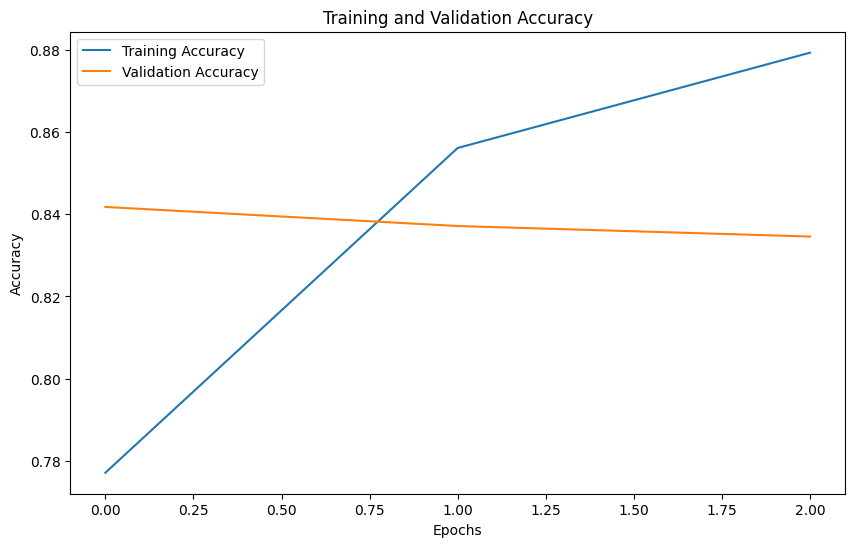

In [11]:
# Step 9: Plot the training and validation accuracy over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

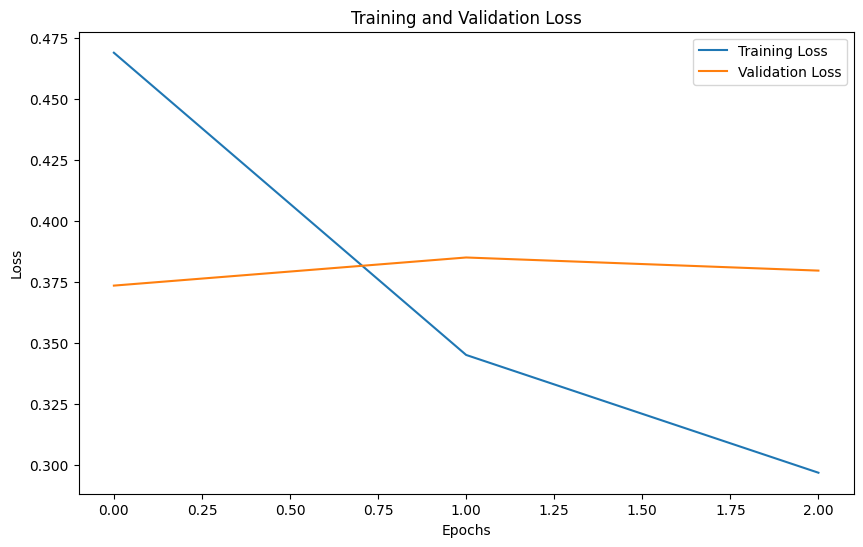

In [12]:
# Step 10: Plot the training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
# Step 11: Predict the sentiment of some sample test reviews
sample_reviews = x_test[:5]
predictions = model.predict(sample_reviews)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step


In [14]:
# Step 12: Visualize the predictions
for i, prediction in enumerate(predictions):
    print(f"Review {i+1}: {'Positive' if np.argmax(prediction) == 1 else 'Negative'}")
    print("Prediction Probabilities:", prediction)
    print("-" * 50)

Review 1: Negative
Prediction Probabilities: [0.64483577 0.35516423]
--------------------------------------------------
Review 2: Positive
Prediction Probabilities: [0.01493337 0.98506665]
--------------------------------------------------
Review 3: Positive
Prediction Probabilities: [0.3632985 0.6367015]
--------------------------------------------------
Review 4: Positive
Prediction Probabilities: [0.32289892 0.6771011 ]
--------------------------------------------------
Review 5: Positive
Prediction Probabilities: [0.00217351 0.9978265 ]
--------------------------------------------------
